# lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv('D:\Data\python\Machine_Leaarning\csv\data_classification.csv')
data = dataframe.values.tolist()

In [4]:
true_values = []
false_values = []
for item in dataframe.values:
    if(item[2] == 1):
        true_values.append(item)
    else:
        false_values.append(item)

In [5]:
a = dataframe.drop('C', axis = 1)
b = dataframe['C']
features = np.array(a.values.tolist()) 
labels = np.array(b.values.tolist()) 

In [6]:
labels = labels.reshape((100,1))
features = np.concatenate((np.ones((features.shape[0], 1)),features), axis = 1)

In [7]:
X_train, Y_train, X_test, Y_test = train_test_split(features, labels, test_size=0.1, random_state=10)

## thiết lập hàm xác suất cho model

In [8]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

## khởi tạo giá trị của weight là 3 biến ngẫu nhiên

In [9]:
def W():
    np.random.seed(9)
    weights = np.array(np.random.random_sample((3,))) 
    weights = weights.reshape((3,1))
    return weights

## tính xác suất của toàn bộ tập giá trị test

In [10]:
def predict(X_train, weights):
    k = []
    for i in range(len(X_train)):
        s = sigmoid(np.dot((X_train[i].T),weights))
        k.append(s)
    return np.array(k)

## hàm lỗi ( Loss function)

In [11]:
def loss_function(datas, labels, weights):
    k = []
    predictions = predict(datas, weights)
    for i in range(len(datas)):
        if(labels[i] == 1):
            k.append(-(np.log(predictions[i])))
        else:
            k.append(-(np.log(1 - predictions[i])))
    return ((np.array(k).sum())/len(datas))

In [12]:
def gradient_descent(datas, labels, weights, learning_rate):
    predition = predict(datas, weights)
    gd = ((np.dot(datas.T, (predition - labels)))/len(datas))*learning_rate
    weights = weights - gd
    return weights

In [13]:
def training(datas, labels, weights, learning_rate, epoch):
    loss = []
    for i in range(epoch):
        weights = gradient_descent(datas, labels, weights, learning_rate)
        loss.append(loss_function(datas, labels, weights))
    return weights, loss

In [14]:
def loss_map(epoch, loss):
    plt.title('Loss function')
    iters = np.arange(epoch)
    plt.plot(iters,loss)
    plt.xlabel('epoch');
    plt.ylabel('loss values')
    plt.show()

In [15]:
def bieudo( weight ):
    t = 0.6
    x = np.array(true_values).T[0]
    y = np.array(true_values).T[1]
    a = np.array(false_values).T[0]
    b = np.array(false_values).T[1]
    plt.scatter(x,y,color='red');
    plt.scatter(a,b,color='green');
    plt.scatter(4,6,color='y');
    plt.plot((0, 10),(-(weight[0]+0*weight[1]+ np.log(1/t-1))/weight[2], -(weight[0] + 10*weight[1]+ np.log(1/t-1))/weight[2]), 'b')
    plt.show()

In [16]:
def sub(epoch, loss, weight):
    loss_map(epoch, loss)
    bieudo(weight)

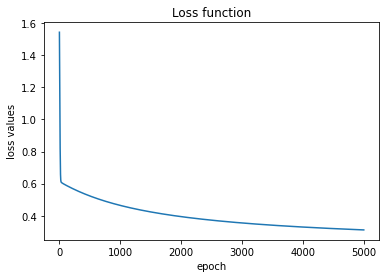

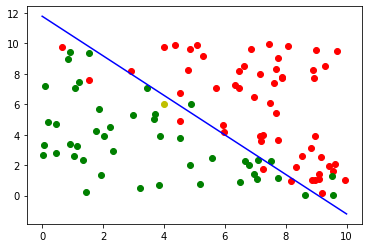

In [17]:
# def main():
learning_rate = 0.015
epoch = 5000
weights = W()
X_train, Y_train, X_test, Y_test = train_test_split(features, labels, test_size=0.1, random_state=10)
weight, loss = training(X_train, X_test, weights, learning_rate, epoch)
sub(epoch, loss, weight)

In [18]:
def test(test_data, test_labels, weight):
    resual = []
    for i in range(len(test_data)):
        resual.append(sigmoid(np.dot((test_data[i].T),weight)))
    return np.array(resual)

In [19]:
def resual():
    count = 0
    re = test(Y_train, Y_test, weight)
    for i in range(len(Y_test)):
        if abs(re[i] -Y_test[i]) >= 0.45:
            count = count + 1
    return count

In [20]:
print("do chinh xac cua mo hinh la {0}% tren {1} tap gia tri test".format((len(Y_test) - resual())*10, 10))

do chinh xac cua mo hinh la 80% tren 10 tap gia tri test
